## PROJECT :
- The main aim to build the model which predict the profit based on R&D Spend,Administration,Marketing Spend.

## About the 50 startups dataset
- This particular dataset holds data from 50 startups in New York, California, and Florida. The features in this dataset are R&D spending, Administration Spending, Marketing Spending, and location features, while the target variable is: Profit.

1. R&D spending: The amount which startups are spending on Research and development.
2. Administration spending: The amount which startups are spending on the Admin panel.
3. Marketing spending: The amount which startups are spending on marketing strategies.
4. State: To which state that particular startup belongs.
5. Profit: How much profit that particular startup is making.


## In this project we use some python libraries.                                                                                                       
  **1.Pandas :**                                                                                                                                       
  **2.Numpy :**                                                                                                                                       
  **3.Matplotlib :**                                                                                                                                   
  **4.Seaborn :**                                                                                                                                     
- **With the help of these liabraries we visualized our dataset and perform below operations** 

<h2 style="color:red" >  Regression Analysis :</h2>

- Import the libraries.
- Read the file.
- Perform the basic operations.


In [1]:
# import all libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn 
%matplotlib inline

In [2]:
# read the file
df=pd.read_csv('50_Startups.csv')

In [3]:
# top five row
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Last five row
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
# All information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


- This dataset has total 50 row and 5 column.
- Most of the column has numeric datatype i.e. float64.
- State column has object datatype.

In [6]:
# Description of data
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


- There are 50 sample present in data.

In [7]:
# checking for the missing Values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

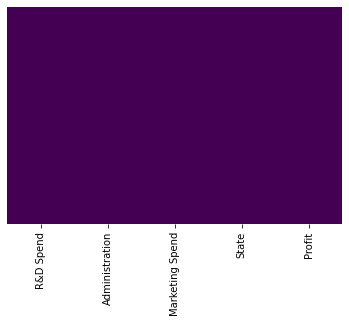

In [8]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="viridis")

- **There is no missing values present in our dataset so no need to handle it.**
- **But if is there any missing value are present is data set so we handle that values by using fillna         method.**
- **Handling that values with mean,median,ffill,bfill etc.**

### Exploratory Data Analysis :

In [9]:
# check the correlation
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


- We can see that all three columns have a direct relationship with the profit, which is our target variable.

**How Profit are related to other variable.**

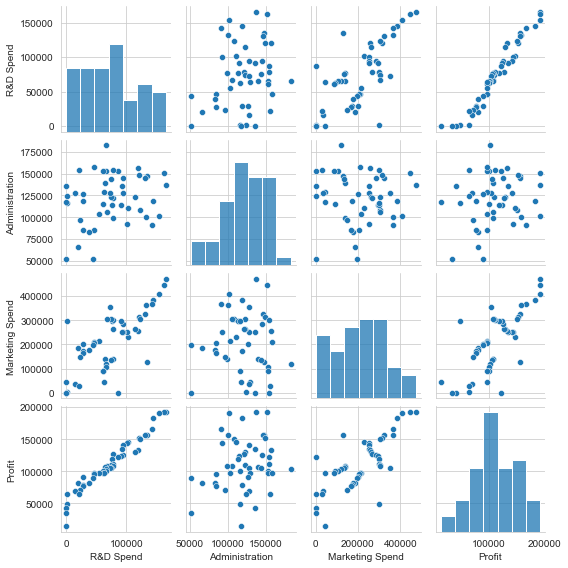

In [10]:
#pairplot
sns.set_style("whitegrid");
sns.pairplot(df,height=2);
plt.show()

**Conclusion -** R&D SPEND is strongly, positively, linearly correlated with the target variable. But the Administration feature seems to be             uncorrelated

- A pair plot allows us to see both distribution of single variables and relationship between two variables.

**As seen above the pair plot can be divided into three parts**
- The diagonal plot which showcase the histogram It  allow us to see the probability distribution of a         single variable.
- Upper triangle and lower triangle which shows us the scatter plot.
- The scatter plot shows us the relationship between the features

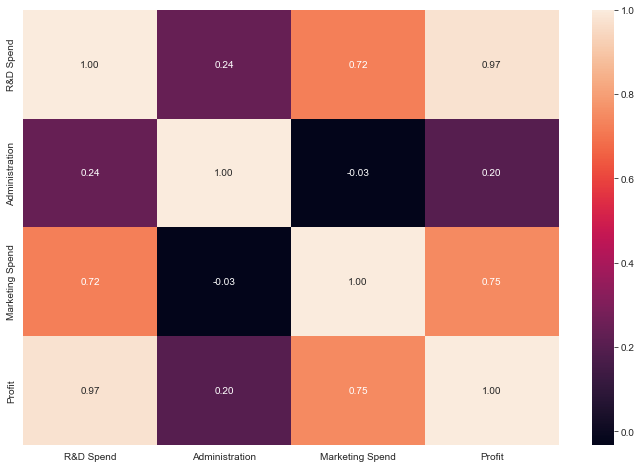

In [11]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

**Conclusion -** R&D spend to be most correlated with profit as 0.97 is very close to 1.

<h2 style="color:blue"> Data preprocessing and cleaning :</h2>

In [12]:
# checking for total number of unique values
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [13]:
# checking for duplicate data
df.duplicated().sum()

0

In [14]:
# converting all features dtype float64 into the int32
df[['R&D Spend','Administration','Marketing Spend','Profit']]=df[['R&D Spend','Administration','Marketing Spend','Profit']].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R&D Spend        50 non-null     int32 
 1   Administration   50 non-null     int32 
 2   Marketing Spend  50 non-null     int32 
 3   State            50 non-null     object
 4   Profit           50 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1.3+ KB


**Handling the Outlier**

<AxesSubplot:xlabel='Profit'>

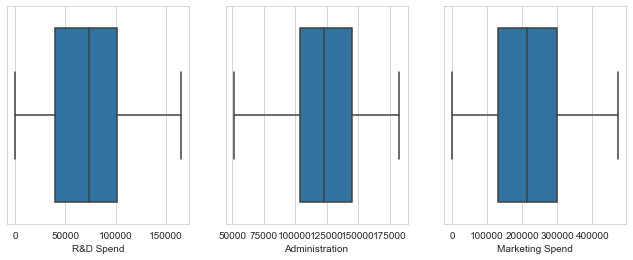

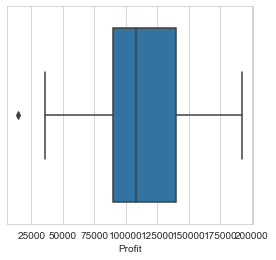

In [16]:
#so plotting box plot : 
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.boxplot(x='R&D Spend',data=df,orient='h')

plt.subplot(1,4,2)
sns.boxplot(x='Administration',data=df,orient='h')
plt.subplot(1,4,3)
sns.boxplot(x='Marketing Spend',data=df,orient='h')

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)

sns.boxplot(x='Profit',data=df,orient='h')

- While looking at the boxplot we can see the outliers in the profit(target variable), but the amount of data is not much (just 50 entries) so it       won’t create much negative impact.

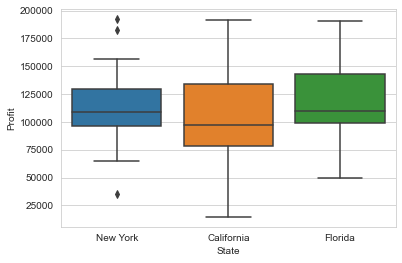

In [17]:
# State-wise outliers detection
sns.boxplot(x = 'State', y = 'Profit', data = df)
plt.show()

-  All outliers presented are in New York.
-  The startups located in California we can see the maximum profits and maximum loss.

**Handling the categorical Value :**

- In above dataset, we can clearly see that there are five variables, in which four variables are continuous   and one is categorical variable.

- categorical variables which are not suitable to apply directly for fitting the model. So we need to encode   this variable.

- By using **Label Encoding** we can handel the Categorical value.

In [18]:
from sklearn import preprocessing   
obj = preprocessing.LabelEncoder()  

In [19]:
df[ 'State' ]= obj.fit_transform(df[ 'State' ])   
(df[ 'State' ].unique())

array([2, 0, 1])

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349,136897,471784,2,192261
1,162597,151377,443898,0,191792
2,153441,101145,407934,1,191050
3,144372,118671,383199,2,182901
4,142107,91391,366168,1,166187


**Skewness Handling**

- Reduce or remove the skewness for only those column whose correlation with the target is not good

In [21]:
from scipy.stats import skew

R&D Spend
0.15904508687285582


C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


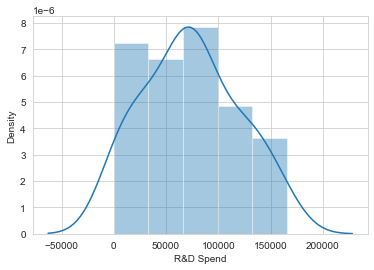

Administration
-0.47422885651214824


C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


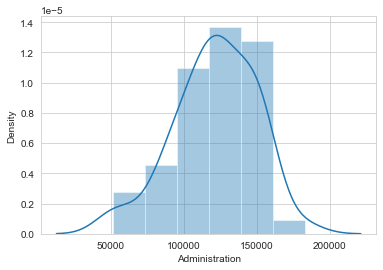

Marketing Spend
-0.0450639875390879


C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


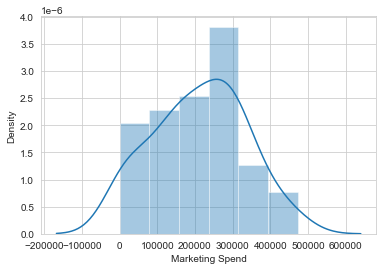

State
0.0


C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


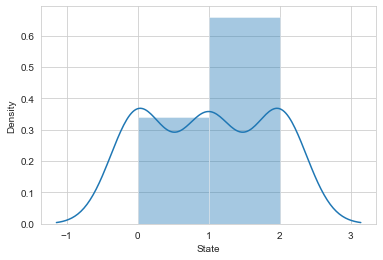

Profit
0.022585452555172705


C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


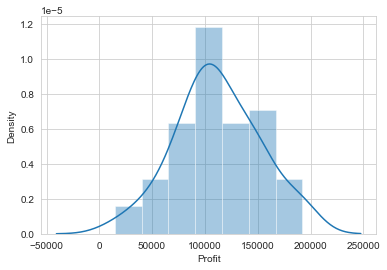

In [22]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

- now here we can handle the skewness, but only those columns whose correlation is not good with our target column because when we handling the skewness it affects on the correlation.

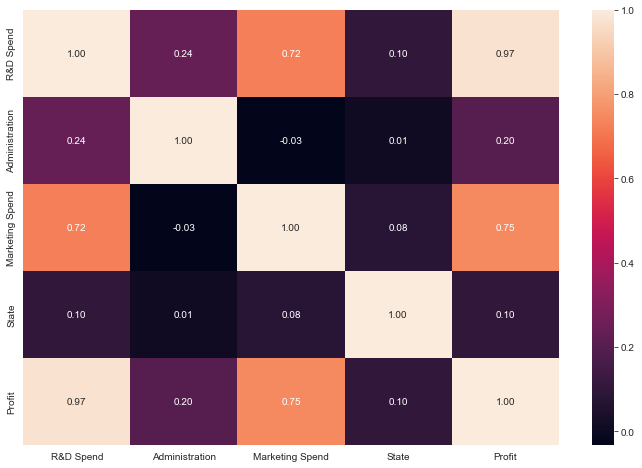

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

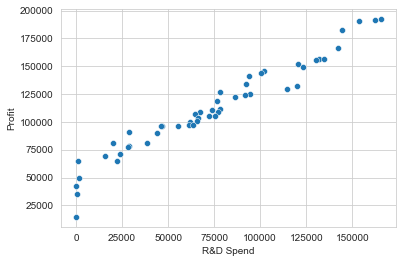

In [24]:
sns.scatterplot(data=df,x='R&D Spend',y="Profit")

- Now our data is clean and prepare,So our data is ready to apply the Machine Learning Algorithm 

**Here Our target variable is "Profit" and feature is "R&D Spend".**

**Extracting dependent and independent Variables:**

<h2 style="color:orange" > Model Building :</h2> 

- Linear Regression is a useful tool for predicting a quantitative response.
- **Prediction using:** 

             1. Simple Linear Regression                                                                         
             2. Multiple Linear Regression 

<h2 style='color:red'> Simple Linear Regression : </h2>

- Simple linear regression has only one x and one y variable. It is an approach for predicting a               quantitative response using a single feature. 

- It establishes the relationship between two variables using a straight line. Linear regression attempts to   draw a line that comes closest to the data by finding the slope and intercept that define the line and       minimize regression errors.

- **Extracting dependent and independent Variables:**

In [25]:
# Independent variable
X=df['R&D Spend'].values.reshape(-1,1)

In [26]:
# dependent variable
y=df['Profit'].values

In [27]:
X.size

50

**Now we will split the dataset into training and test Dataset.**

In [28]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0) 

- Fitting the machine learning model to the training dataset.

In [30]:
Sreg= LinearRegression() 
Sreg.fit(X_train, y_train)

LinearRegression()

- Now, we have successfully trained our model using the training dataset.
- we will test the performance of the model using the test dataset.

In [31]:
#Predicting the Test Dataset result;  
y_test_pred= Sreg.predict(X_test)
y_train_pred=Sreg.predict(X_train)

**Now we calculate the Model intercept and coefficient**

In [33]:
# printing the model intercept and coefficient
Sreg.intercept_
Sreg.coef_
print('Intercept: ', Sreg.intercept_)
print('Coefficient:',Sreg.coef_)

Intercept:  48416.14326129784
Coefficient: [0.85162306]


C:\Users\91705\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


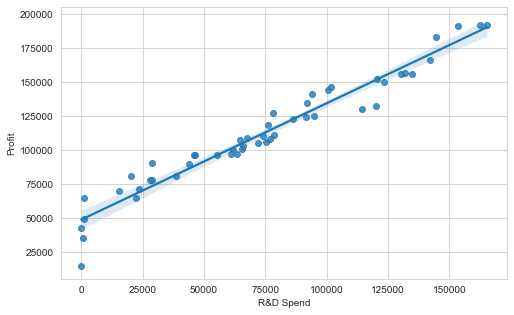

In [34]:
#line of best fit
plt.figure(figsize=(8,5));
sns.regplot(X,y);
plt.xlabel('R&D Spend')
plt.ylabel("Profit")
plt.show()

In [35]:
# prediction for training and testing dataset
print("Prediction for test set: {}".format(y_test_pred))

Prediction for test set: [104666.69785247 134149.88811373 135207.60395153  72169.61358964
 179090.03687418 109824.12709055  65643.62609766 100480.97052335
 111431.13980063 169437.741137  ]


In [36]:
print("Prediction for train set: {}".format(y_train_pred))

Prediction for train set: [ 95675.26160815  87602.7266432  112567.20495974  87953.59534302
 126551.70719198 159380.92444736 150562.36768378  49267.7663191
  48877.72295863 104286.87396869 145946.57071047 101211.66310695
 102415.85811069 114853.81286995  68548.51234784 113354.95628821
  61620.55877259 151072.4898954  126758.65159503 103485.49667129
 160724.78563258 129028.22704408  72903.71266546  48416.1432613
 186887.49759145 128352.03833619  85946.31979577 114028.59012694
 163057.38118791 105927.95160108  72826.2149672  115174.02313969
 122012.55629387 153450.2214728   81253.0251242   49536.02758231
 171366.66736293 189231.16424654  48416.1432613   67302.58781427]


In [37]:
#Actual values and predicted values
val_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_pred})
val_diff

,Actual value,Predicted value
0,103282,104666.697852
1,144259,134149.888114
2,146121,135207.603952
3,77798,72169.613590
4,191050,179090.036874
5,105008,109824.127091
6,81229,65643.626098
7,97483,100480.970523
8,110352,111431.139801
9,166187,169437.741137


In [38]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the simple_model: {:.2f}'.format(Sreg.score(X,y)*100))

R squared value of the simple_model: 94.61


<h2 style='color:green'> Evaluation Metrics : </h2>

**print the R2 and MSE values for the model**

- **FOR MSE :**

In [39]:
from sklearn.metrics import *

In [40]:
Simple_MSE=mean_squared_error(y_train,y_train_pred)
print('MSE_train_set',Simple_MSE)

Simple_mse=mean_squared_error(y_test,y_test_pred)
print('MSE_test_set',Simple_mse)

MSE_train_set 90128482.36572275
MSE_test_set 68475184.38738039


- **FOR R2 :**

In [41]:
Simple_R2=r2_score(y_train,y_train_pred)
print('r2_score_train :',Simple_R2)

Simple_r2=r2_score(y_test,y_test_pred)
print('r2_score_test :',Simple_r2)

r2_score_train : 0.9449586989676767
r2_score_test : 0.9464571400905005


- **According to the R2 squared_score 94.64% of data fit the simple linear regression model**

<h2 style="color:olive"> Apply Regularization for more accuraccy :</h2>

- **Using Lasso Regression Model(L1 Regularization) :**

In [42]:
from sklearn import linear_model
S_lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
S_lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [43]:
print("S_Lasso_Regression_train_score :",S_lasso_reg.score(X_train, y_train))
print("S_Lasso_Regression_test_score :",S_lasso_reg.score(X_test, y_test))

S_Lasso_Regression_train_score : 0.944958698967676
S_Lasso_Regression_test_score : 0.946457138774222


- **Using Ridge Regression Model (L2 Regularization):**

In [44]:
from sklearn.linear_model import Ridge
S_ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
S_ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [45]:
print ("S_Ridge_regression_test_score :",S_ridge_reg.score(X_test,y_test))
print("S_Ridge_regression_train_score :",S_ridge_reg.score(X_train,y_train))

S_Ridge_regression_test_score : 0.946457140062476
S_Ridge_regression_train_score : 0.9449586989676767


- **We see that Lasso And Ridge prove to be beneficial when our Simple Linear       Regression Model is not perform good,they gives more accuracy than simple Linear Regression**

<h2 style='color:maroon'> Multiple Linear Regression : </h2>

- Multiple linear regression has **one y and two or more x variables.** It is an extension of Simple Linear   regression as it takes more than one predictor variable to predict the response variable.

- Multiple Linear Regression is one of the important regression algorithms which models the linear             relationship between a single dependent continuous variable and more than one independent variable. 

- **Assumptions for Multiple Linear Regression:**                                                                    
    1. A linear relationship should exist between the Target and predictor variables.
    2. The regression residuals must be normally distributed. 
    3. MLR assumes little or no multicollinearity (correlation between the independent variable) in data.

- **Selecting X and Y for Multiple linear regression :**

In [46]:
X=df[['R&D Spend','Marketing Spend']] # independent variable
y =df['Profit'] # dependent variable

In [47]:
X.head(0)

,R&D Spend,Marketing Spend


In [48]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=2) 

In [49]:
mlr= LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [50]:
#Predicting the Test Dataset result;  
y_test_pred= mlr.predict(X_test)
y_train_pred=mlr.predict(X_train)

In [51]:
print("Prediction for test set: {}".format(y_test_pred))

Prediction for test set: [ 76005.27450761  46979.75247498 103003.06898616 154243.53849332
 127777.62450768 192762.97889474  65433.33513442  57367.553701
  83019.37232629 110046.47360071]


In [52]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_pred})
mlr_diff

,Actual value,Predicted value
36,90708,76005.274508
47,42559,46979.752475
28,103282,103003.068986
9,149759,154243.538493
13,134307,127777.624508
0,192261,192762.978895
44,65200,65433.335134
46,49490,57367.553701
39,81005,83019.372326
23,108733,110046.473601


In [53]:
# printing the model intercept and coefficient
#Printing the model coefficients
print("Intercept :",mlr.intercept_)
# pair the feature names with the coefficients
list(zip(X, mlr.coef_))

Intercept : 46979.752474982364


[('R&D Spend', 0.7919136315150218), ('Marketing Spend', 0.03145740288433233)]

### Performance Measures :

- **FOR MSE :**

In [54]:
M_MSE=mean_squared_error(y_train,y_train_pred)
print('M_MSE_train_set',M_MSE)

M_mse=mean_squared_error(y_test,y_test_pred)
print('M_MSE_test_set',M_mse)

M_MSE_train_set 89471890.57820606
M_MSE_test_set 36668001.08544352


- **FOR R2 :**

In [55]:
M_R2=r2_score(y_train,y_train_pred)
print('M_R2_train_set',M_R2)

M_r2=r2_score(y_test,y_test_pred)
print('M_R2_test_set',M_r2)

M_R2_train_set 0.938877264925646
M_R2_test_set 0.9814160775648911


- **According to the R2 squared_score 95.09% of data fit the Multiple linear regression model**

<h2 style="color:red">Regularization for Multiple Linear Regression :</h2>

- **Using Lasso Regression Model(L1 Regularization) :**

In [56]:
from sklearn import linear_model
M_lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
M_lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [57]:
print("M_Lasso_Regression_train_score :",M_lasso_reg.score(X_train, y_train))
print("M_Lasso_Regression_test_score :",M_lasso_reg.score(X_test, y_test))

M_Lasso_Regression_train_score : 0.9381992992502024
M_Lasso_Regression_test_score : 0.9812933516215776


- **Using Ridge Regression Model (L2 Regularization):**

In [58]:
from sklearn.linear_model import Ridge
M_ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
M_ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [59]:
print ("M_Ridge_regression_train_score :",M_ridge_reg.score(X_train,y_train))
print("M_Ridge_regression_test_score :",M_ridge_reg.score(X_test,y_test))

M_Ridge_regression_train_score : 0.938877264925646
M_Ridge_regression_test_score : 0.9814160775387085


## CONCLUSION :

In [60]:
print ("ALL RESULTS \n")

print("INTERCEPT AND COEFFICIENT OF SIMPLE LINEAR REGRESSION")
print('Intercept: ', Sreg.intercept_)
print('Coefficient:',Sreg.coef_)

print("------------------------------------------------------------\n")
print("PERFORMANCE MEASURE FOR SIMPLE LINEAR REGRESSION")
print("MSE :")
print('MSE_train_set',Simple_MSE)
print('MSE_test_set',Simple_mse,'\n')

print("------------------------------------------------------------\n")
print("R2_SQUARED")
print('r2_score_train :',Simple_R2)
print('r2_score_test :',Simple_r2,"\n")

print("----------------------------------------------------------------\n")
print("RESULT FOR MULTIPLE LINEAR REGRESSION")
print("PERFORMANCE MEASURE FOR MULTIPLE LINEAR REGRESSION")
print("MSE :")
print('M_MSE_train_set',M_MSE)
print('M_MSE_test_set',M_mse,'\n')

print("R2-SQUARED")
print('M_R2_train_set',M_R2)
print('M_R2_test_set',M_r2,)

print("----------------------------------------------------------------\n")
print("REGULARIZATION FOR MULTIPLE LINEAR REGRESSION")
print("M_Lasso_Regression_train_score :",M_lasso_reg.score(X_train, y_train))
print("M_Lasso_Regression_test_score :",M_lasso_reg.score(X_test, y_test),'\n')
print ("M_Ridge_regression_train_score :",M_ridge_reg.score(X_train,y_train))
print("M_Ridge_regression_test_score :",M_ridge_reg.score(X_test,y_test),'\n')
print("___________________________________________________________________________")

ALL RESULTS 

INTERCEPT AND COEFFICIENT OF SIMPLE LINEAR REGRESSION
Intercept:  48416.14326129784
Coefficient: [0.85162306]
------------------------------------------------------------

PERFORMANCE MEASURE FOR SIMPLE LINEAR REGRESSION
MSE :
MSE_train_set 90128482.36572275
MSE_test_set 68475184.38738039 

------------------------------------------------------------

R2_SQUARED
r2_score_train : 0.9449586989676767
r2_score_test : 0.9464571400905005 

----------------------------------------------------------------

RESULT FOR MULTIPLE LINEAR REGRESSION
PERFORMANCE MEASURE FOR MULTIPLE LINEAR REGRESSION
MSE :
M_MSE_train_set 89471890.57820606
M_MSE_test_set 36668001.08544352 

R2-SQUARED
M_R2_train_set 0.938877264925646
M_R2_test_set 0.9814160775648911
----------------------------------------------------------------

REGULARIZATION FOR MULTIPLE LINEAR REGRESSION
M_Lasso_Regression_train_score : 0.9381992992502024
M_Lasso_Regression_test_score : 0.9812933516215776 

M_Ridge_regression_train